In [1]:
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir = '../../../aha_runs/04_feb_TSref_output/'
ds = open_mdsdataset(data_dir, iters=[0])

In [4]:
ds

<xarray.Dataset>
Dimensions:  (XC: 448, XG: 448, YC: 512, YG: 512, Z: 100, Zl: 100, Zp1: 101, Zu: 100, time: 1)
Coordinates:
    iter     (time) int64 0
  * time     (time) int64 0
  * XC       (XC) >f8 239.0 239.0 239.0 239.1 239.1 ... 245.9 246.0 246.0 246.0
  * YC       (YC) >f8 27.01 27.02 27.04 27.05 27.07 ... 34.95 34.96 34.98 34.99
  * XG       (XG) >f8 239.0 239.0 239.0 239.0 239.1 ... 245.9 246.0 246.0 246.0
  * YG       (YG) >f8 27.0 27.02 27.03 27.05 27.06 ... 34.94 34.96 34.97 34.99
  * Z        (Z) >f8 -1.0 -3.0 -5.0 -7.0 ... -4.07e+03 -4.308e+03 -4.565e+03
  * Zp1      (Zp1) >f8 0.0 -2.0 -4.0 -6.0 ... -4.185e+03 -4.43e+03 -4.7e+03
  * Zu       (Zu) >f8 -2.0 -4.0 -6.0 -8.0 ... -4.185e+03 -4.43e+03 -4.7e+03
  * Zl       (Zl) >f8 0.0 -2.0 -4.0 -6.0 ... -3.955e+03 -4.185e+03 -4.43e+03
    rA       (YC, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    dxG      (YG, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    dyG      (YC, XG) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    Depth    (YC, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    rAz      (YG, XG) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    dxC      (YC, XG) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    dyC      (YG, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    rAw      (YC, XG) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    rAs      (YG, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    drC      (Zp1) >f8 1.0 2.0 2.0 2.0 2.0 2.1 ... 205.0 220.0 237.5 257.4 134.9
    drF      (Z) >f8 2.0 2.0 2.0 2.0 2.0 2.2 ... 200.0 210.0 230.0 245.0 269.8
    PHrefC   (Z) >f8 9.81 29.43 49.05 68.67 ... 3.993e+04 4.226e+04 4.478e+04
    PHrefF   (Zp1) >f8 0.0 19.62 39.24 58.86 ... 4.106e+04 4.346e+04 4.611e+04
    hFacC    (Z, YC, XC) >f8 dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    hFacW    (Z, YC, XG) >f8 dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    hFacS    (Z, YG, XC) >f8 dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(100, 512, 448), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
Data variables:
    Eta      (time, YC, XC) >f8 dask.array<chunksize=(1, 512, 448), meta=np.ndarray>
    V        (time, Z, YG, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    T        (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    S        (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    W        (time, Zl, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    U        (time, Z, YC, XG) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=[0...

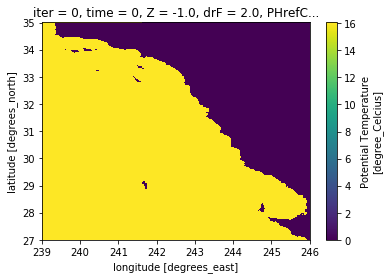

In [7]:
ds.T.isel(Z=0).plot()

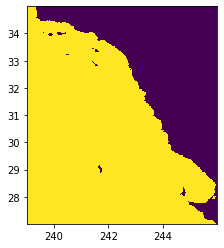

In [26]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.pcolormesh(ds.XC, ds.YC, ds.T[0,0,:,:])
ax.set_aspect(1)

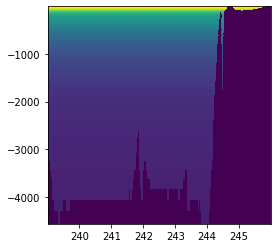

In [14]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.pcolormesh(ds.XC, ds.Z, ds.T[0,:,70,:])


In [24]:
# Volume weighted Salinity avg

volume = ds.hFacC * ds.drF * ds.rA
avg = (ds.T * volume).sum() / volume.sum()
print(avg.data)

dask.array<truediv, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [25]:
ds.S.mean()

<xarray.DataArray 'S' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [28]:
avg*5000

<xarray.DataArray ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>